## Exploratory Data Analysis Sederhana Dataset COVID-19 DKI Jakarta

Oleh: Arsyi Adlani - Tim Ardito CompFest13 Data Science 2021

## Latar Belakang

Terhitung pada tanggal 18 Juli 2021, pandemi Covid-19 (Corona Virus Disease 2019) telah
melanda Indonesia selama 16 bulan sejak pemerintah Indonesia mengumumkan ditemukannya
dua kasus pertama Covid-19 pada 2 Maret 2020. Sejak saat itu, berbagai usaha telah dilakukan
baik oleh pemerintah pusat maupun pemerintah daerah untuk menekan laju penyebaran dan
fatalitas Covid-19. Pemprov DKI Jakarta telah berulang kali menerapkan Pembatasan Sosial
Berskala Besar (PSBB), mulai dari tiga fase PSBB ketat, PSBB transisi, Pemberlakuan
Pembatasan Kegiatan Masyarakat (PPKM) Mikro, hingga akhirnya pemerintah secara terpusat
menarik rem darurat dengan kebijakan PPKM Darurat Jawa-Bali pada 3 Juli 2021.

Dimulainya program vaksinasi serentak nasional pada 13 Januari 2021 sebenarnya membawa
harapan bahwa pemulihan kondisi pandemi dapat terakselerasi. Namun demikian, kenyataan
yang terjadi seolah masih jauh dari harapan tersebut. Terhitung hingga 19 Juli 2021, DKI
Jakarta menjadi penyumbang kasus terkonfirmasi tertinggi sebanyak 727,010 kasus atau 26.1%
dari 2,877,476 kasus di Indonesia dengan kasus positif aktif tertinggi di Indonesia yaitu
sebanyak 112,957 kasus. Hal ini cukup menarik perhatian dengan mulai munculnya
skeptisisme dan sentimen negatif di kalangan masyarakat mengenai efektivitas program
vaksinasi yang diselenggarakan pemerintah. Dengan menggunakan dataset yang diperoleh dari
situs resmi pemantauan Covid-19 Pemprov DKI Jakarta corona.jakarta.go.id, kami melakukan
studi perbandingan sederhana dengan melakukan analisis statistik kondisi pandemi sebelum
dan sesudah dimulainya program vaksinasi di DKI Jakarta.

## Hipotesis

Hipotesis dalam analisis perbandingan ini, yaitu:
    
- Hipotesis Awal (H0): Tidak adanya korelasi antara penyelenggaraan program vaksinasi
terhadap penurunan laju penyebaran dan fatalitas kasus Covid-19 secara keseluruhan
di DKI Jakarta.

- Hipotesis Kerja (H1): Adanya korelasi (positif) antara penyelenggaraan program
vaksinasi terhadap penurunan laju penyebaran dan fatalitas kasus Covid-19 secara
keseluruhan di DKI Jakarta.

## Exploratory Data Analysis

In [2]:
import dtale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

### A. Eksplorasi Awal Dataset

In [22]:
data = pd.read_csv("Data Jakarta.csv").drop(['Unnamed: 17', 'Unnamed: 18', 
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 
       'Unnamed: 27', 'Unnamed: 28'], axis=1)

Berdasarkan problem statement yang telah ditentukan sebelumnya, terdapat tiga aspek yang
perlu dianalisis, yaitu laju penyebaran, fatalitas, dan pemulihan kasus Covid-19 di DKI Jakarta.
Oleh karena itu, digunakan dataset ‘Data Jakarta’ pada data yang diperoleh secara langsung
dari link tiny.cc/Datacovidjakarta. Terdapat 17 variabel pada dataset ini, yaitu:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Tanggal                             498 non-null    object 
 1   Jam                                 479 non-null    float64
 2   Tanggal Jam                         498 non-null    object 
 3   Total Pasien                        498 non-null    int64  
 4   Sembuh                              498 non-null    int64  
 5   Meninggal                           498 non-null    int64  
 6   Self Isolation                      498 non-null    int64  
 7   Masih Perawatan                     498 non-null    int64  
 8   Belum Diketahui (masih verifikasi)  0 non-null      float64
 9   Menunggu Hasil                      6 non-null      float64
 10  Tenaga Kesehatan Terinfeksi         6 non-null      float64
 11  Positif Harian                      498 non-n

Dari 17 variabel tersebut, akan digunakan variabel inti berikut dalam proses analisis:
- ‘Tanggal’: Digunakan sebagai index dari dataset secara keseluruhan
- ‘Positif Harian’: Untuk menganalisis informasi perkembangan laju penyebaran
- ‘Sembuh Harian’: Untuk menganalisis informasi perkembangan laju pemulihan
- ‘Positif Aktif’: Untuk memperoleh informasi kondisi sebaran setiap waktu

Selain itu, akan digunakan variabel baru ‘Meninggal Harian’ yang di-generate dari variabel
‘Meninggal’ untuk menganalisis informasi perkembangan laju fatalitas.

In [25]:
daily_deaths = [data['Meninggal'][0]]
for i in range(1, len(data['Meninggal'])):
    death = data['Meninggal'][i] - data['Meninggal'][i-1]
    daily_deaths.append(death)

data['Meninggal Harian'] = daily_deaths

In [26]:
data[['Tanggal','Positif Harian', 'Positif Aktif',
       'Sembuh Harian', 'Meninggal Harian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tanggal           498 non-null    object
 1   Positif Harian    498 non-null    int64 
 2   Positif Aktif     498 non-null    int64 
 3   Sembuh Harian     498 non-null    int64 
 4   Meninggal Harian  498 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.6+ KB


Terlihat bahwa tersedia 498 titik data dengan tidak ada missing values yang hadir dalam
dataset. Tipe data telah sesuai yang diharapkan berupa integer int64, namun variabel ‘Tanggal’
masih berupa string object dan perlu untuk dikonversi menjadi datetime sebelum dijadikan
sebagai indeks dataset.

In [40]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
data.set_index('Tanggal', inplace=True)

Pada statistics summary berikut, dapat diperoleh informasi bahwa standar deviasi setiap
variabel cukup besar relatif terhadap mean. Ini menunjukkan cukup lebarnya fluktuasi nilai
pada data. Selain itu, ada hal menarik yang dapat diamati. Dari setiap nilai kuartil data, terdapat
disparitas nilai yang cukup jauh antara kuartil ketiga (75%) dengan nilai maksimum (max) data
seluruh variabel. Ini menunjukkan adanya tren kenaikan data, baik penyebaran maupun
fatalitas, yang cukup tinggi pada seperempat data terakhir.

In [41]:
data[['Positif Harian', 'Positif Aktif',
       'Sembuh Harian', 'Meninggal Harian']].describe()

,Positif Harian,Positif Aktif,Sembuh Harian,Meninggal Harian
count,498.000000,498.000000,498.000000,498.000000
mean,1330.204819,11525.291165,1133.407631,18.865462
std,1935.925803,14538.551102,1737.210972,19.328464
min,0.000000,0.000000,0.000000,0.000000
25%,213.500000,4489.500000,159.250000,6.000000
50%,875.500000,7771.000000,848.500000,15.000000
75%,1434.750000,12803.750000,1294.750000,23.000000
max,13133.000000,102082.000000,20570.000000,196.000000


### B. Analisis Univariat Awal

Analisis berikut ini merupakan analisis univariat sederhana setiap variabel inti analisis. Perlu
diperhatikan bahwa seluruh analisis pada bagian ini belum mempertimbangkan karakteristik
sekuensial time series yang sebenarnya dimiliki oleh seluruh variabel yang dianalisis.

### 1) Positif Harian

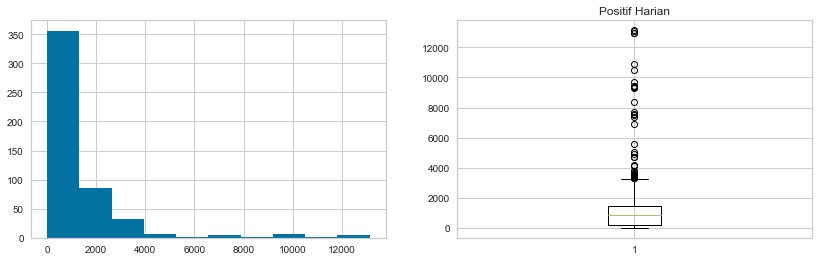

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Positif Harian')
ax1.hist(data['Positif Harian'], density=False)
ax2.boxplot(data['Positif Harian'])
plt.show()

In [32]:
data['Positif Harian'].skew()

3.6166639843620474

Dari visualisasi tersebut, diperoleh informasi bahwa variabel ‘Positif Harian’ memiliki
distribusi right-skewed dengan koefisien skewness sebesar 3.616. Jika kita memandang data
‘Positif Harian’ tanpa sifat sekuensialnya terhadap waktu, dapat terlihat bahwa banyak titik
data yang berada di luar jarak 1.5 IQR (Interquartile Range) dari nilai median. Hal ini yang
menyebabkan distribusi data menjadi skewed.

### 2) Meninggal Harian

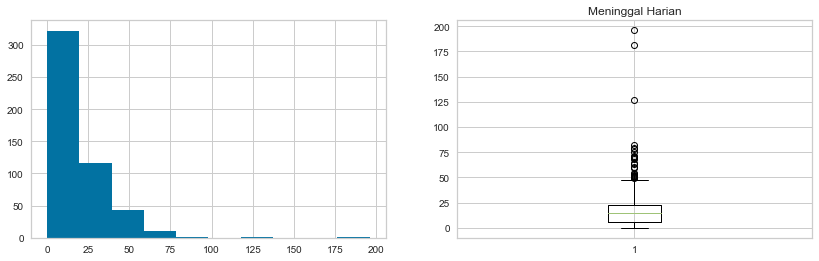

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Meninggal Harian')
ax1.hist(data['Meninggal Harian'], density=False)
ax2.boxplot(data['Meninggal Harian'])
plt.show()

In [34]:
data['Meninggal Harian'].skew()

3.7175500764195553

Dari visualisasi tersebut, diperoleh informasi bahwa variabel ‘Meninggal Harian’ memiliki
distribusi right-skewed dengan koefisien skewness sebesar 3.717. Jika kita memandang data
‘Meninggal Harian’ tanpa sifat sekuensialnya terhadap waktu, dapat terlihat bahwa cukup
banyak titik data yang berada di luar jarak 1.5 IQR (Interquartile Range) dari nilai median.

### 3) Sembuh Harian

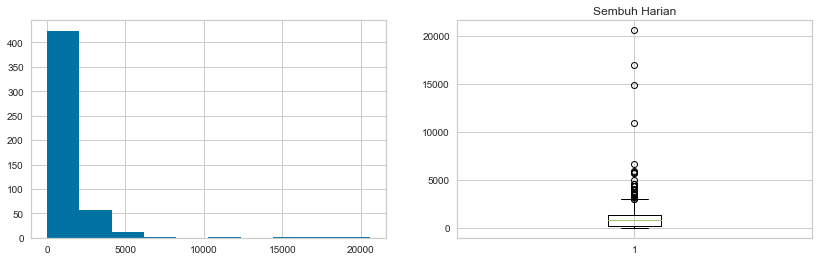

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Sembuh Harian')
ax1.hist(data['Sembuh Harian'], density=False)
ax2.boxplot(data['Sembuh Harian'])
plt.show()

In [36]:
data['Sembuh Harian'].skew()

6.082047599250389

Dari visualisasi tersebut, diperoleh informasi bahwa variabel ‘Sembuh Harian’ memiliki
distribusi right-skewed dengan koefisien skewness sebesar 6.082. Jika kita memandang data
‘Sembuh Harian’ tanpa sifat sekuensialnya terhadap waktu, dapat terlihat bahwa banyak titik
data yang berada di luar jarak 1.5 IQR (Interquartile Range) dari nilai median. Hal ini yang
turut menyebabkan distribusi data menjadi skewed.

### 4) Positif Aktif

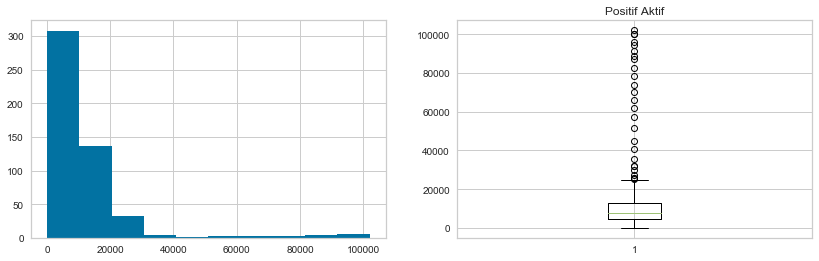

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Positif Aktif')
ax1.hist(data['Positif Aktif'], density=False)
ax2.boxplot(data['Positif Aktif'])
plt.show()

In [38]:
data['Positif Aktif'].skew()

4.14090300337705

Dari visualisasi tersebut, diperoleh informasi bahwa variabel ‘Positif Aktif’ juga memiliki
distribusi right-skewed dengan koefisien skewness sebesar 4.128. Jika kita memandang data
‘Positif Aktif’ tanpa sifat sekuensialnya terhadap waktu, dapat terlihat bahwa banyak titik data
yang berada di luar jarak 1.5 IQR (Interquartile Range) dari nilai median. Hal ini yang turut
menyebabkan distribusi data menjadi skewed.

Dari analisis keempat variabel tersebut, diperoleh informasi bahwa mayoritas data, baik positif
harian, meninggal harian, maupun sembuh harian berada di angka yang cukup rendah dengan
beberapa titik data dengan nilai sangat tinggi. Dari analisis di bagian sebelumnya, kita ketahui
bahwa kenaikan nilai-nilai tersebut terjadi pada kuartal akhir data.

### C. Analisis Univariat Lanjutan

Pada bagian ini, akan dilakukan analisis tren setiap variabel terhadap variabel ‘Tanggal’ yang
menjadi indeks dataset.

In [51]:
data['Hari Ke-'] = np.arange(1, len(data)+1, 1)

### 1) Positif Harian

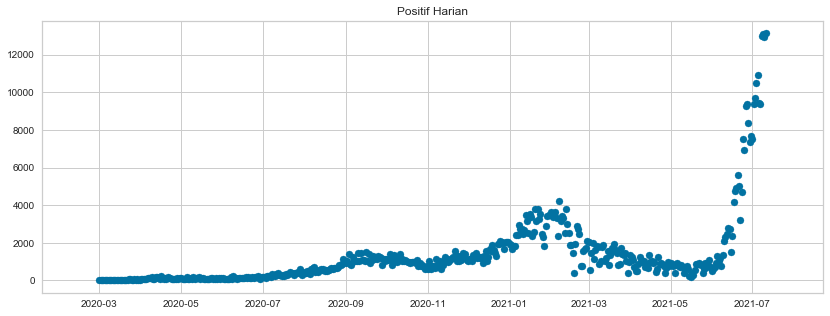

In [47]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Positif Harian')
ax1.scatter(x=data.index, y=data['Positif Harian'])

In [52]:
data[['Hari Ke-', 'Positif Harian']].cov()

,Hari Ke-,Positif Harian
Hari Ke-,20708.500000,1.564882e+05
Positif Harian,156488.173038,3.747809e+06


Visualisasi tersebut membuktikan analisis awal sebelumnya bahwa mayoritas data positif
harian berada pada level yang relatif rendah, namun terjadi kenaikan hampir secara
eksponensial pada kuartal akhir data. Analisis kovarians yang memberikan nilai positif
(1.564e+05) menunjukkan tren kenaikan data. Terlihat kenaikan mulai terjadi dari pertengahan
bulan Juni 2021 hingga akhir data (11 Juli 2021).

### 2) Meninggal Harian

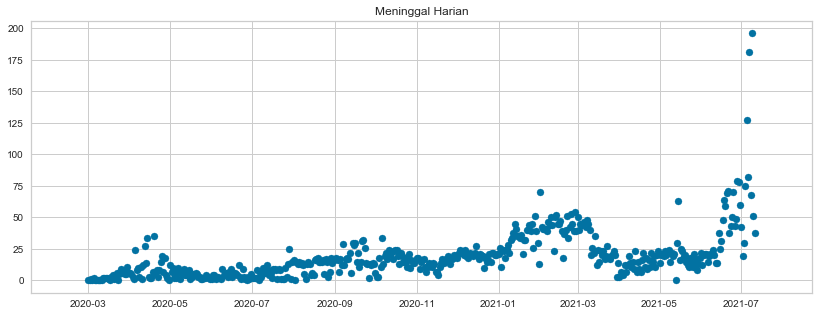

In [53]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Meninggal Harian')
ax1.scatter(x=data.index, y=data['Meninggal Harian'])

In [54]:
data[['Hari Ke-', 'Meninggal Harian']].cov()

,Hari Ke-,Meninggal Harian
Hari Ke-,20708.500000,1592.594567
Meninggal Harian,1592.594567,373.589509


Visualisasi tersebut juga membuktikan analisis awal sebelumnya bahwa mayoritas data
meninggal harian berada pada level yang relatif rendah, namun terjadi kenaikan pada kuartal
akhir data. Analisis kovarians yang memberikan nilai positif (1592.6) juga menunjukkan tren
kenaikan data.

### 3) Sembuh Harian

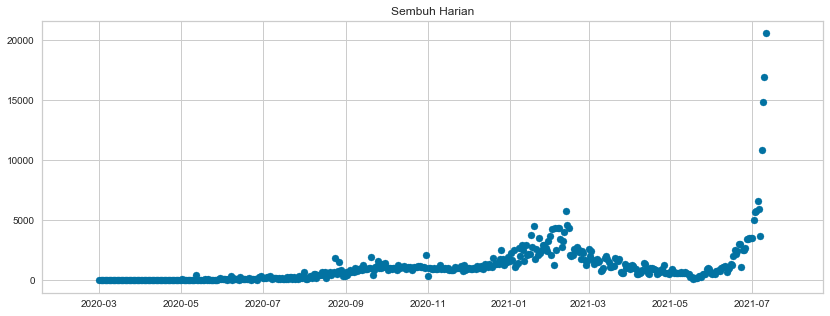

In [55]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Sembuh Harian')
ax1.scatter(x=data.index, y=data['Sembuh Harian'])

In [56]:
data[['Hari Ke-', 'Sembuh Harian']].cov()

,Hari Ke-,Sembuh Harian
Hari Ke-,20708.500000,1.219608e+05
Sembuh Harian,121960.769618,3.017902e+06


Visualisasi tersebut membuktikan analisis awal sebelumnya bahwa mayoritas data sembuh
harian berada pada level yang relatif rendah, namun terjadi kenaikan pada kuartal akhir data.
Analisis kovarians yang memberikan nilai positif (1.219e+05) juga menunjukkan tren kenaikan
data.

### 4) Positif Aktif

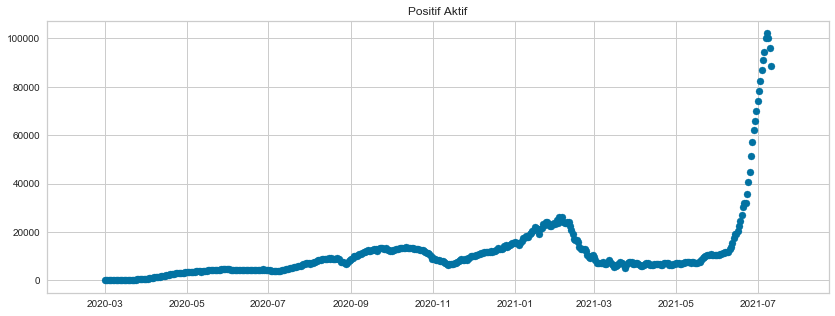

In [57]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Positif Aktif')
ax1.scatter(x=data.index, y=data['Positif Aktif'])

In [58]:
data[['Hari Ke-', 'Positif Aktif']].cov()

,Hari Ke-,Positif Aktif
Hari Ke-,2.070850e+04,1.084810e+06
Positif Aktif,1.084810e+06,2.113695e+08


Visualisasi tersebut juga membuktikan analisis awal sebelumnya bahwa mayoritas data
sembuh harian berada pada level yang relatif rendah, namun terjadi kenaikan signifikan pada
kuartal akhir data. Analisis kovarians yang memberikan nilai positif (1.084e+06) juga
menunjukkan tren kenaikan data. Terlihat kenaikan juga mulai terjadi dari pertengahan bulan
Juni 2021 hingga 11 Juli 2021.

### D. Analisis Multivariat

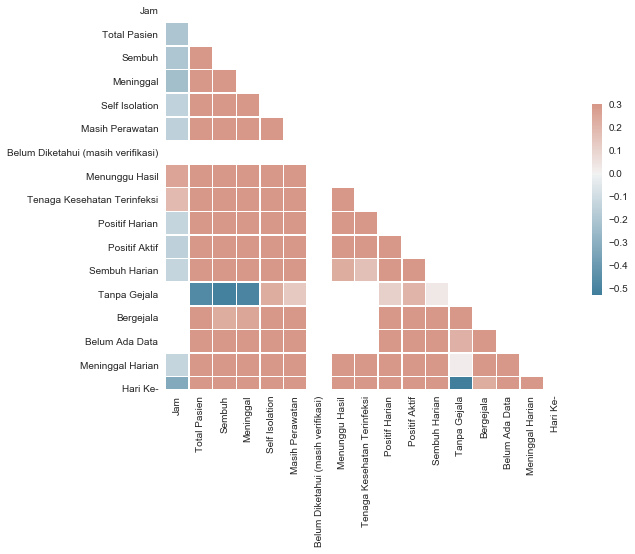

In [66]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(9, 7))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
data[['Positif Harian', 'Meninggal Harian', 'Sembuh Harian', 'Positif Aktif']].corr()

,Positif Harian,Meninggal Harian,Sembuh Harian,Positif Aktif
Positif Harian,1.000000,0.758031,0.847333,0.961915
Meninggal Harian,0.758031,1.000000,0.638628,0.745067
Sembuh Harian,0.847333,0.638628,1.000000,0.810787
Positif Aktif,0.961915,0.745067,0.810787,1.000000


Dari tabel korelasi, terlihat bahwa ketiga variabel memiliki korelasi positif yang cukup kuat.
Hal ini tentu mendukung hasil analisis sebelumnya bahwa karena ketiga variabel sama-sama
memiliki hubungan positif dengan ‘Tanggal’, maka analisis korelasi antara ketiga variabel pun
akan bernilai positif.

## Initial Findings

Pada bagian ini, dilakukan quick comparison ketiga aspek variabel antara sebelum program
vaksinasi serentak mulai dilaksanakan (sebelum 13 Januari 2021) dengan setelah program
vaksinasi serentak mulai dilaksanakan (setelah 13 Januari 2021) dengan menggunakan tendensi
sentral data.

In [72]:
vac_start_date = datetime.strptime('13/1/21', '%d/%m/%y')  # 13 Jan 2021
vac_start_index = data['Hari Ke-'][data.index==vac_start_date].values[0]-1

### 1) Positif Harian

In [74]:
print('Penambahan Kasus Harian Sebelum 13 Jan 21')
print(data['Positif Harian'].iloc[:vac_start_index].describe())
print()
print('Penambahan Kasus Harian Setelah 13 Jan 21')
print(data['Positif Harian'].iloc[vac_start_index:].describe())

Penambahan Kasus Harian Sebelum 13 Jan 21
count     318.000000
mean      664.314465
std       626.146022
min         0.000000
25%       116.250000
50%       484.000000
75%      1063.500000
max      2959.000000
Name: Positif Harian, dtype: float64

Penambahan Kasus Harian Setelah 13 Jan 21
count      180.000000
mean      2506.611111
std       2744.487815
min        161.000000
25%        851.750000
50%       1457.500000
75%       3154.500000
max      13133.000000
Name: Positif Harian, dtype: float64


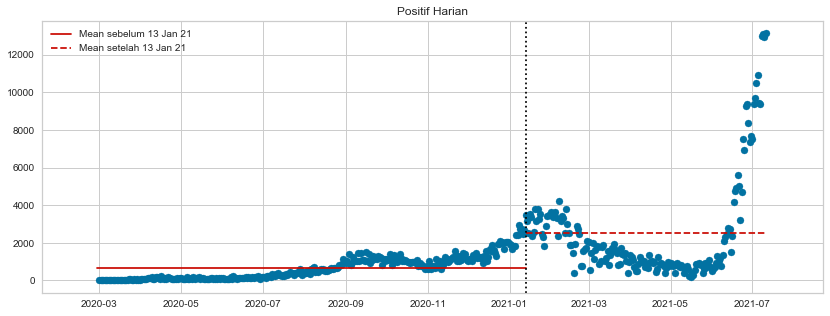

In [70]:
fig, (ax1) = plt.subplots(1,1,figsize=(14,5))

ax1.scatter(x=data.index, y=data['Positif Harian'])
ax1.axhline(y=664.314, xmin = (vac_start_index-283)/497, xmax=(vac_start_index-10)/497, c='r', 
            label='Mean sebelum 13 Jan 21')
ax1.axhline(y=2506.61, xmin = (vac_start_index-10)/497, xmax=0.925, c='r', 
            label='Mean setelah 13 Jan 21', linestyle = 'dashed')
ax1.axvline(x = vac_start_date, color = 'black', linestyle = ':')

plt.title('Positif Harian')
plt.legend()

Dengan membagi dua daerah analisis dengan tanggal 13 Januari 2021 (sebelum dan sesudah
program vaksinasi), diperoleh adanya peningkatan rata-rata positif harian dengan sebelum 13
Januari 2021 sebesar 664.314 kasus (standar deviasi 626.146, menjadi 2506.61 kasus (standar
deviasi 2744.48) setelah 13 Januari 2021.

### 2) Meninggal Harian

In [75]:
print('Kasus Meninggal Harian Sebelum 13 Jan 21')
print(data['Meninggal Harian'].iloc[:vac_start_index].describe())
print()
print('Kasus Meninggal Harian Setelah 13 Jan 21')
print(data['Meninggal Harian'].iloc[vac_start_index:].describe())

Kasus Meninggal Harian Sebelum 13 Jan 21
count    318.000000
mean      11.286164
std        8.475044
min        0.000000
25%        4.000000
50%       11.000000
75%       17.000000
max       38.000000
Name: Meninggal Harian, dtype: float64

Kasus Meninggal Harian Setelah 13 Jan 21
count    180.000000
mean      32.255556
std       25.054605
min        0.000000
25%       17.750000
50%       23.000000
75%       43.000000
max      196.000000
Name: Meninggal Harian, dtype: float64


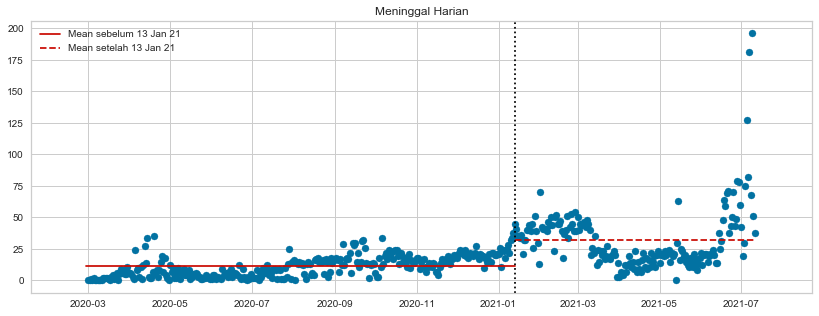

In [78]:
fig, (ax1) = plt.subplots(1,1,figsize=(14,5))

ax1.scatter(x=data.index, y=data['Meninggal Harian'])
ax1.axhline(y=11.28, xmin = (vac_start_index-283)/497, xmax=(vac_start_index-10)/497, c='r', 
            label='Mean sebelum 13 Jan 21')
ax1.axhline(y=32.25, xmin = (vac_start_index-10)/497, xmax=0.925, c='r', 
            label='Mean setelah 13 Jan 21', linestyle = 'dashed')
ax1.axvline(x = vac_start_date, color = 'black', linestyle = ':')

plt.title('Meninggal Harian')
plt.legend()

Diperoleh adanya peningkatan rata-rata meninggal harian dengan sebelum 13 Januari 2021
sebanyak 11.28 kasus (standar deviasi 8.47), menjadi 32.25 kasus (standar deviasi 25.05)
setelah 13 Januari 2021.

### 3) Sembuh Harian

In [79]:
print('Kasus Sembuh Harian Sebelum 13 Jan 21')
print(data['Sembuh Harian'].iloc[:vac_start_index].describe())
print()
print('Kasus Sembuh Harian Setelah 13 Jan 21')
print(data['Sembuh Harian'].iloc[vac_start_index:].describe())

Kasus Sembuh Harian Sebelum 13 Jan 21
count     318.000000
mean      593.317610
std       602.344533
min         0.000000
25%        46.000000
50%       382.000000
75%      1049.500000
max      2963.000000
Name: Sembuh Harian, dtype: float64

Kasus Sembuh Harian Setelah 13 Jan 21
count      180.000000
mean      2087.566667
std       2510.590360
min        128.000000
25%        726.500000
50%       1327.000000
75%       2552.750000
max      20570.000000
Name: Sembuh Harian, dtype: float64


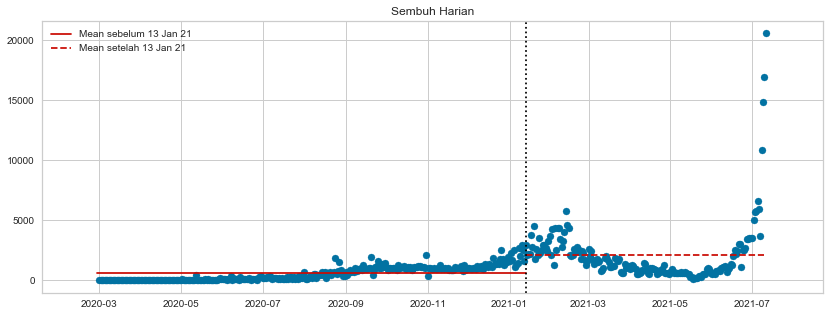

In [81]:
fig, (ax1) = plt.subplots(1,1,figsize=(14,5))

ax1.scatter(x=data.index, y=data['Sembuh Harian'])
ax1.axhline(y=593.31, xmin = (vac_start_index-283)/497, xmax=(vac_start_index-10)/497, c='r', 
            label='Mean sebelum 13 Jan 21')
ax1.axhline(y=2087.57, xmin = (vac_start_index-10)/497, xmax=0.925, c='r', 
            label='Mean setelah 13 Jan 21', linestyle = 'dashed')
ax1.axvline(x = vac_start_date, color = 'black', linestyle = ':')

plt.title('Sembuh Harian')
plt.legend()

Diperoleh adanya peningkatan rata-rata sembuh harian dengan sebelum 13 Januari 2021
sebanyak 593.31 kasus (standar deviasi 602.34), menjadi 2087.57 kasus (standar deviasi
2510.59) setelah 13 Januari 2021.

Secara keseluruhan, diperoleh hasil awal sebagai berikut:
    
- Terjadi peningkatan penyebaran serta fatalitas kasus Covid-19 di DKI Jakarta secara
signifikan setelah tanggal 13 Januari 2021.
- Meskipun demikian, kasus pemulihan (sembuh harian) turut mengalami peningkatan
yang signifikan setelah tanggal 13 Januari 2021.

## Deep Dive Analysis

Berangkat dari temuan awal, kami menyadari bahwa perbandingan ketiga aspek (sebaran,
fatalitas, pemulihan) belum dilakukan secara apple-to-apple. Dengan perolehan informasi
sebelumnya bahwa kasus positif aktif mengalami peningkatan signifikan setelah 13 Januari
2021, maka tentu ‘wajar’ jika tingkat penyebaran, fatalitas, dan sembuh harian turut meningkat
setelah 13 Januari 2021.

Oleh karena itu, kami melakukan analisis perbandingan ketiga aspek tersebut relatif terhadap
variabel ‘Positif Aktif’, yaitu variabel yang menunjukkan tingkat ‘keparahan’ pandemi pada
setiap waktu tertentu.

In [ ]:
data['PH/PA'] = data['Positif Harian'] / data['Positif Aktif']  # Positif Harian Relatif
data['MH/PA'] = data['Meninggal Harian'] / data['Positif Aktif']  # Meninggal Harian Relatif
data['SH/PA'] = data['Sembuh Harian'] / data['Positif Aktif']  # Sembuh Harian Relatif

data['Interval'] = 0
data['Interval'].iloc[:vac_start_index] = np.arange(0,vac_start_index,1)
data['Interval'].iloc[vac_start_index:] = np.arange(0,len(data['Interval'])-vac_start_index,1)

### 1) Positif Harian Relatif terhadap Positif Aktif (PH/PA)

In [97]:
print('Penambahan Positif Harian/Positif Aktif Sebelum 13 Jan 21')
print(data['PH/PA'].iloc[:vac_start_index].describe())
print()
print('Penambahan Positif Harian/Positif Aktif Setelah 13 Jan 21')
print(data['PH/PA'].iloc[vac_start_index:].describe())

Penambahan Positif Harian/Positif Aktif Sebelum 13 Jan 21
count    316.000000
mean       0.091904
std        0.116252
min        0.000000
25%        0.046844
50%        0.077681
75%        0.112745
max        1.500000
Name: PH/PA, dtype: float64

Penambahan Positif Harian/Positif Aktif Setelah 13 Jan 21
count    180.000000
mean       0.134560
std        0.050936
min        0.022530
25%        0.100577
50%        0.133291
75%        0.163611
max        0.275235
Name: PH/PA, dtype: float64


In [98]:
# Kovarians Sebelum 13 Jan 21
print('Kovarians Sebelum 13 Jan 21')
print(data[['Interval', 'PH/PA']].iloc[:vac_start_index].cov())
print()
# Kovarians Setelah 13 Jan 21
print('Kovarians Setelah 13 Jan 21')
print(data[['Interval', 'PH/PA']].iloc[vac_start_index:].cov())

print()
print()

# Korelasi Sebelum 13 Jan 21
print('Korelasi Sebelum 13 Jan 21')
print(data[['Interval', 'PH/PA']].iloc[:vac_start_index].corr(method='pearson'))
print()
print(data[['Interval', 'PH/PA']].iloc[:vac_start_index].corr(method='spearman'))
print()
# Korelasi Setelah 13 Jan 21
print('Korelasi Setelah 13 Jan 21')
print(data[['Interval', 'PH/PA']].iloc[vac_start_index:].corr(method='pearson'))
print()
print(data[['Interval', 'PH/PA']].iloc[vac_start_index:].corr(method='spearman'))

Kovarians Sebelum 13 Jan 21
             Interval     PH/PA
Interval  8453.500000  0.214597
PH/PA        0.214597  0.013514

Kovarians Setelah 13 Jan 21
             Interval     PH/PA
Interval  2715.000000 -0.812432
PH/PA       -0.812432  0.002594


Korelasi Sebelum 13 Jan 21
          Interval     PH/PA
Interval  1.000000  0.020204
PH/PA     0.020204  1.000000

          Interval     PH/PA
Interval  1.000000  0.521757
PH/PA     0.521757  1.000000

Korelasi Setelah 13 Jan 21
          Interval     PH/PA
Interval  1.000000 -0.306112
PH/PA    -0.306112  1.000000

          Interval     PH/PA
Interval  1.000000 -0.317446
PH/PA    -0.317446  1.000000


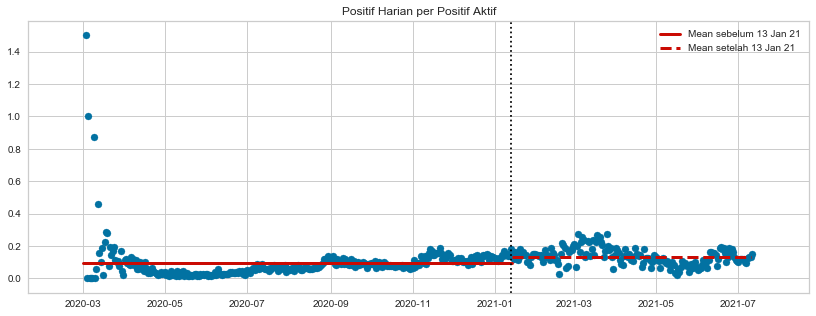

In [85]:
fig, (ax1) = plt.subplots(1,1,figsize=(14,5))

ax1.scatter(x=data.index, y=data['PH/PA'])
ax1.axhline(y= 0.0919, xmin = (vac_start_index-283)/497, xmax=(vac_start_index-10)/497, c='r', 
            label='Mean sebelum 13 Jan 21', linewidth=3)
ax1.axhline(y=0.13456, xmin = (vac_start_index-10)/497, xmax=0.925, c='r', 
            label='Mean setelah 13 Jan 21', linestyle = 'dashed', linewidth=3)
ax1.axvline(x = vac_start_date, color = 'black', linestyle = ':')

plt.title('Positif Harian per Positif Aktif')
plt.legend()

Terlihat bahwa positif harian relatif terhadap banyaknya kasus yang sedang aktif setiap
waktunya cenderung stabil. Terdapat peningkatan mean dengan sebelum 13 Januari 2021
senilai 0.092 (standar deviasi 0.116), menjadi 0.134 (standar deviasi 0.051) setelah 13 Januari 2021. Namun menariknya, analisis korelasi menunjukkan adanya tren penurunan kasus positif
harian/positif aktif dari +0.522 menjadi -0.317446 (Spearman’s correlation) setelah 13 Januari 2021. Peningkatan mean kemungkinan disebabkan oleh banyaknya outliers terutama pada
pertengahan Maret 2021.

### 2) Meninggal Harian Relatif terhadap Positif Aktif (MH/PA)

In [92]:
print('Meninggal Harian/Positif Aktif Sebelum 13 Jan 21')
print(data['MH/PA'].iloc[:vac_start_index].describe())
print()
print('Meninggal Harian/Positif Aktif Setelah 13 Jan 21')
print(data['MH/PA'].iloc[vac_start_index:].describe())

Meninggal Harian/Positif Aktif Sebelum 13 Jan 21
count    316.000000
mean       0.005855
std        0.039798
min        0.000000
25%        0.000893
50%        0.001528
75%        0.001987
max        0.500000
Name: MH/PA, dtype: float64

Meninggal Harian/Positif Aktif Setelah 13 Jan 21
count    180.000000
mean       0.002313
std        0.001413
min        0.000000
25%        0.001425
50%        0.001957
75%        0.002841
max        0.008671
Name: MH/PA, dtype: float64


In [99]:
# Kovarians Sebelum 13 Jan 21
print('Kovarians Sebelum 13 Jan 21')
print(data[['Interval', 'MH/PA']].iloc[:vac_start_index].cov())
print()
# Kovarians Setelah 13 Jan 21
print('Kovarians Setelah 13 Jan 21')
print(data[['Interval', 'MH/PA']].iloc[vac_start_index:].cov())

print()
print()

# Korelasi Sebelum 13 Jan 21
print('Korelasi Sebelum 13 Jan 21')
print(data[['Interval', 'MH/PA']].iloc[:vac_start_index].corr(method='pearson'))
print()
print(data[['Interval', 'MH/PA']].iloc[:vac_start_index].corr(method='spearman'))
print()
# Korelasi Setelah 13 Jan 21
print('Korelasi Setelah 13 Jan 21')
print(data[['Interval', 'MH/PA']].iloc[vac_start_index:].corr(method='pearson'))
print()
print(data[['Interval', 'MH/PA']].iloc[vac_start_index:].corr(method='spearman'))

Kovarians Sebelum 13 Jan 21
             Interval     MH/PA
Interval  8453.500000 -0.663145
MH/PA       -0.663145  0.001584

Kovarians Setelah 13 Jan 21
             Interval     MH/PA
Interval  2715.000000 -0.021579
MH/PA       -0.021579  0.000002


Korelasi Sebelum 13 Jan 21
          Interval     MH/PA
Interval  1.000000 -0.182375
MH/PA    -0.182375  1.000000

          Interval     MH/PA
Interval  1.000000 -0.040727
MH/PA    -0.040727  1.000000

Korelasi Setelah 13 Jan 21
          Interval     MH/PA
Interval  1.000000 -0.293076
MH/PA    -0.293076  1.000000

          Interval     MH/PA
Interval  1.000000 -0.314394
MH/PA    -0.314394  1.000000


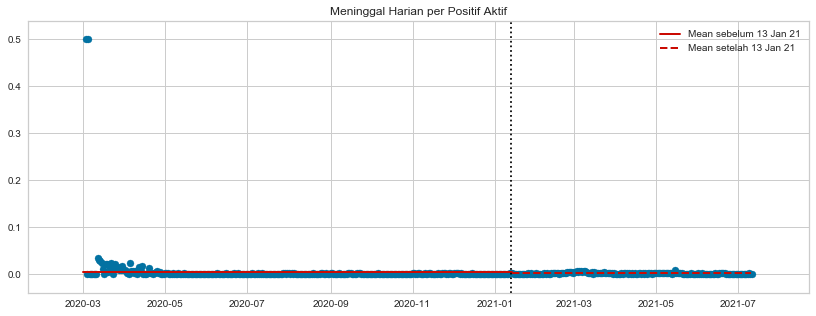

In [91]:
fig, (ax1) = plt.subplots(1,1,figsize=(14,5))

ax1.scatter(x=data.index, y=data['MH/PA'])
ax1.axhline(y= 0.00585, xmin = (vac_start_index-283)/497, xmax=(vac_start_index-10)/497, c='r', 
            label='Mean sebelum 13 Jan 21', linewidth=2)
ax1.axhline(y=0.002313, xmin = (vac_start_index-10)/497, xmax=0.925, c='r', 
            label='Mean setelah 13 Jan 21', linestyle = 'dashed', linewidth=2)
ax1.axvline(x = vac_start_date, color = 'black', linestyle = ':')

plt.title('Meninggal Harian per Positif Aktif')
plt.legend()

Pada kasus meninggal harian relatif terhadap banyaknya kasus yang sedang aktif setiap
waktunya terlihat sangat stabil, bahkan terjadi penurunan. Terdapat penurunan mean dengan
sebelum 13 Januari 2021 senilai 0.0059 (standar deviasi 0.039), menjadi 0.0023 (standar
deviasi 0.0014) setelah 13 Januari 2021. Analisis korelasi menunjukkan adanya penguatan tren
penurunan kasus meninggal harian/positif aktif dari -0.040727 menjadi -0.314394 (Spearman’s
correlation) setelah 13 Januari 2021. Penurunan mean mungkin akan lebih kecil jika outliers
di awal data diabaikan.

### 3) Sembuh Harian Relatif terhadap Positif Aktif (SH/PA)

In [93]:
print('Sembuh Harian/Positif Aktif Sebelum 13 Jan 21')
print(data['SH/PA'].iloc[:vac_start_index].describe())
print()
print('Sembuh Harian/Positif Aktif Setelah 13 Jan 21')
print(data['SH/PA'].iloc[vac_start_index:].describe())

Sembuh Harian/Positif Aktif Sebelum 13 Jan 21
count    316.000000
mean       0.059877
std        0.048651
min        0.000000
25%        0.016927
50%        0.058502
75%        0.092807
max        0.245596
Name: SH/PA, dtype: float64

Sembuh Harian/Positif Aktif Setelah 13 Jan 21
count    180.000000
mean       0.125766
std        0.068420
min        0.017221
25%        0.077185
50%        0.104021
75%        0.173527
max        0.346845
Name: SH/PA, dtype: float64


In [101]:
# Kovarians Sebelum 13 Jan 21
print('Kovarians Sebelum 13 Jan 21')
print(data[['Interval', 'SH/PA']].iloc[:vac_start_index].cov())
print()
# Kovarians Setelah 13 Jan 21
print('Kovarians Setelah 13 Jan 21')
print(data[['Interval', 'SH/PA']].iloc[vac_start_index:].cov())

print()
print()

# Korelasi Sebelum 13 Jan 21
print('Korelasi Sebelum 13 Jan 21')
print(data[['Interval', 'SH/PA']].iloc[:vac_start_index].corr(method='pearson'))
print()
print(data[['Interval', 'SH/PA']].iloc[:vac_start_index].corr(method='spearman'))
print()
# Korelasi Setelah 13 Jan 21
print('Korelasi Setelah 13 Jan 21')
print(data[['Interval', 'SH/PA']].iloc[vac_start_index:].corr(method='pearson'))
print()
print(data[['Interval', 'SH/PA']].iloc[vac_start_index:].corr(method='spearman'))

Kovarians Sebelum 13 Jan 21
             Interval     SH/PA
Interval  8453.500000  3.689884
SH/PA        3.689884  0.002367

Kovarians Setelah 13 Jan 21
             Interval     SH/PA
Interval  2715.000000 -1.943512
SH/PA       -1.943512  0.004681


Korelasi Sebelum 13 Jan 21
          Interval     SH/PA
Interval  1.000000  0.830117
SH/PA     0.830117  1.000000

          Interval     SH/PA
Interval  1.000000  0.886095
SH/PA     0.886095  1.000000

Korelasi Setelah 13 Jan 21
          Interval     SH/PA
Interval  1.000000 -0.545151
SH/PA    -0.545151  1.000000

          Interval     SH/PA
Interval  1.000000 -0.629061
SH/PA    -0.629061  1.000000


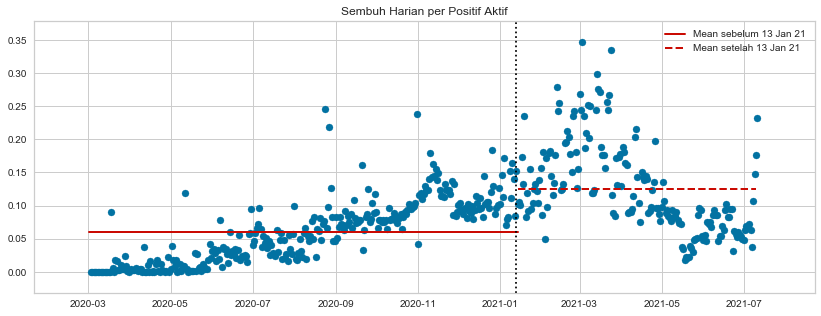

In [95]:
fig, (ax1) = plt.subplots(1,1,figsize=(14,5))

ax1.scatter(x=data.index, y=data['SH/PA'])
ax1.axhline(y= 0.0598, xmin = (vac_start_index-283)/497, xmax=(vac_start_index-10)/497, c='r', 
            label='Mean sebelum 13 Jan 21', linewidth=2)
ax1.axhline(y=0.1257, xmin = (vac_start_index-10)/497, xmax=0.925, c='r', 
            label='Mean setelah 13 Jan 21', linestyle = 'dashed', linewidth=2)
ax1.axvline(x = vac_start_date, color = 'black', linestyle = ':')

plt.title('Sembuh Harian per Positif Aktif')
plt.legend()

Terjadi peningkatan rata-rata sembuh harian per positif aktif dengan sebelum 13 Januari 2021
senilai 0.059 (standar deviasi 0.049), menjadi 0.126 (standar deviasi 0.068) setelah 13 Januari 2021. Namun yang menarik, analisis korelasi justru menunjukkan adanya tren penurunan kasus
sembuh harian/positif aktif setelah 13 Januari 2021 dari +0.886 menjadi -0.629 (Spearman’s
correlation). Seperti terlihat pada visualisasi, peningkatan mean disebabkan oleh banyaknya
outliers dan data yang fluktuatif pada rentang setelah 13 Januari 2021 hingga akhir data.

## Kesimpulan dan Saran

### A. Kesimpulan

Berdasarkan analisis statistik sederhana yang telah dilakukan menggunakan dataset dari situs
resmi pemantauan Covid-19 Pemprov DKI Jakarta corona.jakarta.go.id, diperoleh hasil
sebagai berikut:
    
- Jika dilihat secara jumlah kasus (kuantitas), terjadi peningkatan laju penyebaran (positif
harian), fatalitas (meninggal harian), dan pemulihan (sembuh harian) setelah program
vaksinasi serentak mulai dilaksanakan di DKI Jakarta pada 13 Januari 2021.
- Namun relatif terhadap keparahan kondisi pandemi (‘Positif Aktif’) setiap waktunya,
diperoleh tren penurunan laju penyebaran (positif harian) dan fatalitas (meninggal
harian), sedangkan rata-rata sembuh harian mengalami peningkatan meskipun dalam
tren penurunan setelah tanggal 13 Januari 2021. Artinya, relatif terhadap tingkat virality
wabah Covid-19 di DKI Jakarta, diperoleh kondisi yang lebih baik setelah program
vaksinasi 13 Januari 2021 dilaksanakan.

Hal yang perlu diperhatikan adalah karena keterbatasan data yang tersedia, analisis ini hanya
menunjukkan kondisi keseluruhan pandemi di DKI Jakarta antara sebelum dan sesudah
vaksinasi berjalan, bukan mengukur efektivitas dari vaksin itu sendiri. Adanya korelasi
peningkatan meninggal harian misalnya, bukan berarti menunjukkan kausalitas bahwa vaksin
justru meningkatkan fatalitas. Banyak faktor lain yang mempengaruhi ketiga aspek yang
dianalisis, mulai dari kesadaran masyarakat terhadap protokol kesehatan, daya tampung rumah
sakit, hingga mutasi varian baru yang tentu saja di luar cakupan dataset yang tersedia.

### B. Saran

Terdapat beberapa saran untuk pengembangan analisis selanjutnya, antara lain:
- Dapat dilakukan analisis yang serupa, namun dengan penanganan outliers terlebih
dahulu pada setiap variabelnya. Hal ini perlu dipertimbangkan karena outliers dapat
mempengaruhi nilai rata-rata (mean) dan standar deviasi data.
- Analisis lanjutan dapat dilakukan dengan menggunakan dataset yang lebih detail terkait
laju penyebaran, fatalitas, dan pemulihan antara warga yang telah dan belum
divaksinasi. Dengan demikian, akan dapat diperoleh kesimpulan mengenai efektivitas
vaksinasi yang dilakukan.
- Memasukkan faktor-faktor lain dalam analisis seperti imigrasi, emigrasi, daya tampung
rumah sakit, vaksinasi 1, vaksinasi 2, hingga linimasa kebijakan PSBB dan/atau PPKM
yang diambil pemerintah sehingga diperoleh hasil yang lebih komprehensif dan aktual.

## Referensi

JAKARTA HEALTHY, SAFE. Jakarta's COVID-19 Response Team. (n.d.).
https://corona.jakarta.go.id/en.